In [0]:
!wget https://github.com/aashishksahu/Machine-Learning/blob/master/K-Means%20Clustering/kmeans_data.mat?raw=true

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc

In [0]:
# rename the file
!mv kmeans_data.mat?raw=true data.mat

In [4]:
!ls

data.mat  sample_data


In [0]:
# dataset is a matlab file opened using scipy.io.loadmat
# loading data
file = sc.loadmat("data.mat")
# data holds the datset of dimensions 50 x 2
data = np.array(file['X'])

In [0]:
# initialising values
# m is the length of the dataset
m = np.size(data[:, 0])
# initialising 3 centroids in the numpy array centroid of shape 3 x 2
centroid = np.array([1,2,5,4,6,7]).reshape(3,2)
# mindist will be used to store the distance of a data point x(i) from all the 3 centroids
mindist = np.zeros([3, 1], dtype=float)
# minindex will be used to store the index of the minimum value in the array mindist
minindex = np.zeros([m, 1], dtype=float)
# cluster_sum holds the sum of all the datapoints with same cluster
cluster_sum = np.zeros([3, 2], dtype=float)
# counter counts the number of datapoints assigned to a cluster
counter = np.zeros([3, 1], dtype=float)

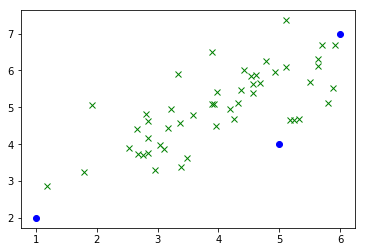

In [7]:
# data points
plt.plot(data[:, 0], data[:,1], 'xg')
# centroids
plt.plot(centroid[:, 0], centroid[:, 1], 'ob')
plt.show()

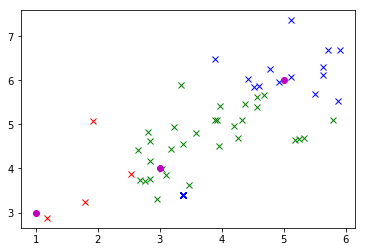

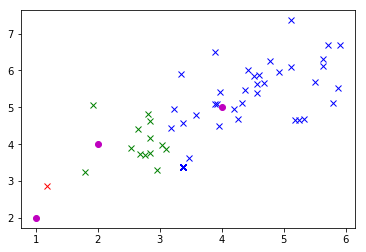

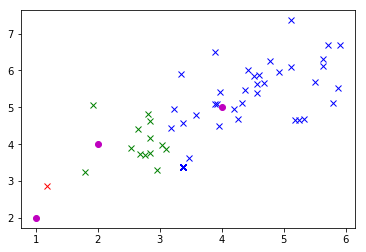

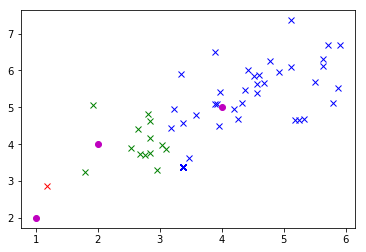

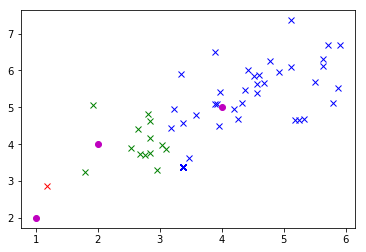

In [8]:
# process starts from here
# for 1000 training iterations
for iter in range(1000):
    # >>cluster assignment step
    # for all training samples
    for i in range(m):
        # and all the centroids
        for k in range(3):
            # calculate the euclidean distance between each centroid and each training sample 
            mindist[k] = (np.sqrt((data[i, 0] - centroid[k, 0])**2 + (data[i, 1] - centroid[k, 1])**2))
        # and save index of the minimum distance between the centroid and the training sample 
        minindex[i] = (np.argmin(mindist, axis=0)[0])
    
    # >> centroid update step
    # for all training samples
    for i in range(m):
        # and all the centroids
        for k in range(3):
            # if index of the minimum distance is equal to k, then, add the datapoints of the same
            # cluster together
            if minindex[i] == k:
                # cluster_sum is of shape [3,1], for each data point that belongs to the kth cluster, 
                # the sum is calculated 
                # in simple words, data points belonging to one of the k clusters are added for 
                # calculating the average
                cluster_sum[k] += data[i]
                # counting the number of data points belonging to each cluster 
                counter[k] += 1

    # taking average
    for k in range(3):
        # taking the average of the data points beloning to the same cluster and assigning the mean to 
        # the centroids
        centroid[k, :] = (1/counter[k]) * cluster_sum[k, :]
        
    if iter%200==0:
        # plotting all the clusters
        # x is data
        plt.plot(data[np.where(minindex == 0), 0], data[np.where(minindex == 0), 1], 'xr')
        plt.plot(data[np.where(minindex == 1), 0], data[np.where(minindex == 1), 1], 'xg')
        plt.plot(data[np.where(minindex == 2), 0], data[np.where(minindex == 2), 1], 'xb')
        # o is centroids
        plt.plot(centroid[:, 0], centroid[:, 1], 'om')
        plt.show()